In [1]:
%load_ext autoreload
%autoreload 2

In [92]:
import argparse
import os

import numpy as np
import torch
from torch.nn.modules.loss import CrossEntropyLoss
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm
import random

from handwriting_recognition.label_converter import LabelConverter
from handwriting_recognition.model.model import HandwritingRecognitionModel
from handwriting_recognition.modelling_utils import get_image_model, get_optimizer
from handwriting_recognition.utils import TrainingConfig, get_dataset_folder_path
from handwriting_recognition.dataset import HandWritingDataset
from pathlib import Path

torch.backends.cudnn.benchmark = True

In [150]:
config_path = Path(get_dataset_folder_path()).parent.joinpath("handwriting_recognition", "configs", "default_config").with_suffix(".json")
config = TrainingConfig.from_path(config_path=config_path)

In [151]:
random.seed(config.seed)
np.random.seed(config.seed)
torch.manual_seed(config.seed)
torch.cuda.manual_seed(config.seed)

In [152]:
data_train = HandWritingDataset(
    data_path=get_dataset_folder_path() / "pre_processed" / "train.csv", img_size=224
)
data_val = HandWritingDataset(
    data_path=get_dataset_folder_path() / "pre_processed" / "validation.csv", img_size=224
)

In [153]:
config.max_text_length = data_train.max_length
config.num_classes = len(data_train.char_set)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = HandwritingRecognitionModel(image_feature_extractor=get_image_model(), training_config=config)

model = model.to(device)
loss_function = CrossEntropyLoss(ignore_index=0).to(device)

optimizer = get_optimizer(
    model=model,
    optim_type=config.optim_config.optim_type,
    lr=config.optim_config.learning_rate,
    momentum=config.optim_config.momentum,
    weight_decay=config.optim_config.weight_decay,
)

train_loader = DataLoader(
    data_train,
    batch_size=config.batch_size,
    pin_memory=False,
    shuffle=True,
    drop_last=True,
)

val_loader = DataLoader(
    data_val,
    batch_size=config.batch_size,
    pin_memory=False,
    shuffle=True,
    drop_last=True,
)

converter = LabelConverter(character_set=data_train.char_set)

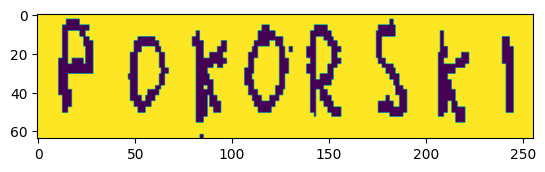

(64, 256)
torch.Size([1, 224, 224])


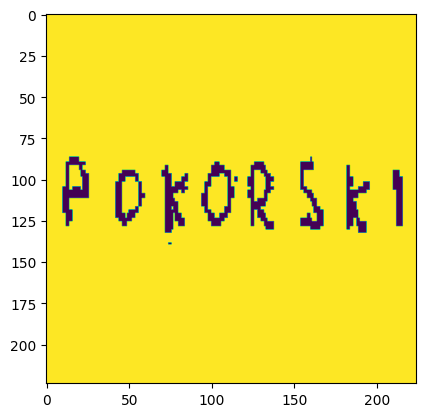

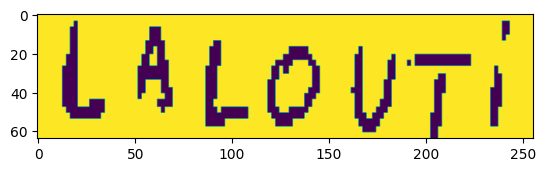

(64, 256)
torch.Size([1, 224, 224])


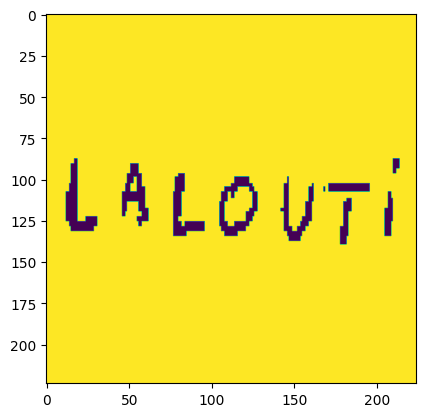

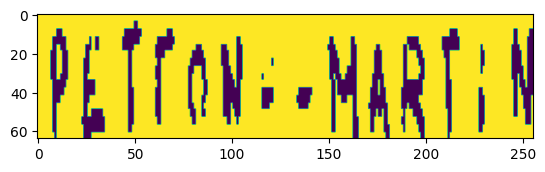

(64, 256)
torch.Size([1, 224, 224])


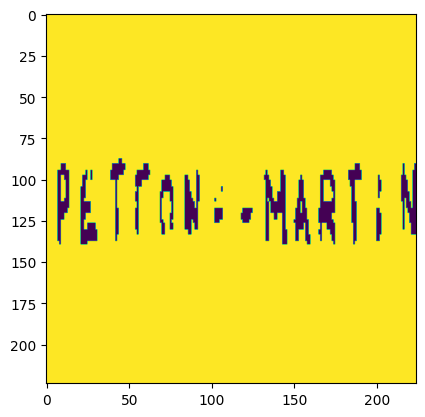

In [154]:
images, labels = next(iter(train_loader))

In [155]:
images.shape

torch.Size([3, 1, 224, 224])

In [156]:
labels

('POKORSKI', 'LALOUTI', 'PETRON  MARTIN')

In [157]:
import numpy as np 
from IPython.display import Image as show_im
from PIL import Image
import matplotlib.pyplot as plt

def visualise_im(path: str):
    output_im = np.array(Image.open(path))
    plt.imshow(output_im)
    plt.show()

In [158]:
from handwriting_recognition.modelling_utils import get_image_model

In [159]:
img_model = get_image_model()

In [170]:
img_model.forward_features(images).shape

/home/faraz/.cache/pypoetry/virtualenvs/handwriting-recognition-05HTZ8rb-py3.11/lib/python3.11/site-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


torch.Size([3, 197, 768])

In [172]:
img_model.embed_dim

768